In [1]:
import pandas as pd

In [2]:
from Processors.ARIMAProcessors import FixedARIMAProcessor, UpdatingARIMAProcessor

In [3]:
from Processors.LSTMProcessors import FixedModelLSTMProcessor, UpdatingModelLSTMProcessor

In [4]:
from Processors.PatchTSTProcessors import FixedModelPatchTSTProcessor, UpdatingModelPatchTSTProcessor

In [5]:
updated_df = pd.read_csv("https://raw.githubusercontent.com/cdcepi/FluSight-forecast-hub/refs/heads/main/target-data/target-hospital-admissions.csv")
updated_df = updated_df[["date", "value", "location_name"]]
updated_df = updated_df[updated_df["location_name"] == "US"]
updated_df["date"] = pd.to_datetime(updated_df["date"])
updated_df.sort_values(by = ["date", "location_name"], inplace = True)
updated_df = updated_df.rename(columns = {"date": "ds", "location_name": "unique_id", "value": "y"})

In [6]:
import plotly.graph_objects as go

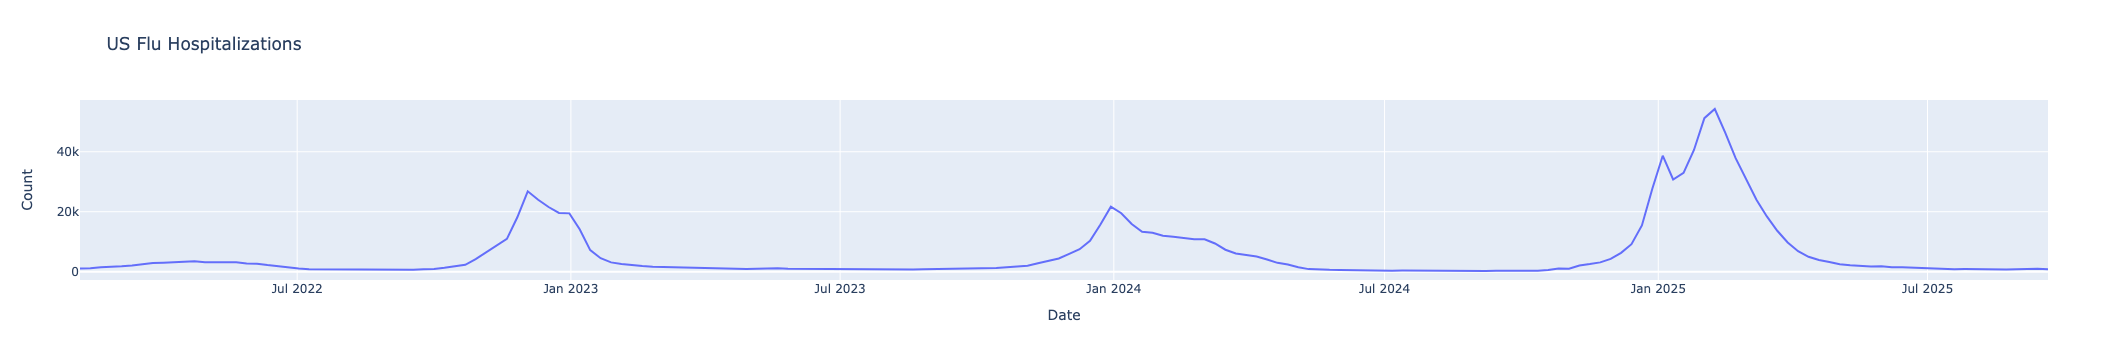

In [7]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=updated_df["ds"], y = updated_df["y"], name="US Flu Hospitalizations", mode="lines"))
fig.update_layout(title = "US Flu Hospitalizations", xaxis_title = "Date", yaxis_title = "Count", hovermode = "x")
fig.show()

In [8]:
quantiles = [.01, .025, .05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, .975, .99]
confidence_intervals = []
for quantile in quantiles:
    if quantile >= 0.5:
        continue
    else:
        lower_bound = quantile * 2
        ci = 1 - lower_bound
        ci = round(ci * 100)
        confidence_intervals.append(ci)

In [9]:
AProcessor = FixedARIMAProcessor(overall_df=updated_df, dates = ["2024-10-05", "2024-10-19", "2024-11-02", "2024-11-16", "2024-12-07"])
AProcessor.create_training_dfs("y")
AProcessor.load_model(path = "AutoARIMA Models/fixed_models/ARIMA_Fixed_USOnly.pkl")
AProcessor.create_fixed_model(h = 4, freq = "W-SAT", model_name = "ARIMA_Fixed_USOnly", season_length = 52, level = confidence_intervals, save = True)

In [10]:
UAProcessor = UpdatingARIMAProcessor(overall_df=updated_df, dates = ["2024-10-05", "2024-10-19", "2024-11-02", "2024-11-16", "2024-12-07"])
UAProcessor.create_training_dfs('y')
UAProcessor.load_models(paths = ["AutoARIMA Models/updating_models/ARIMA_Updating1_USOnly.pkl", "AutoARIMA Models/updating_models/ARIMA_Updating2_USOnly.pkl", "AutoARIMA Models/updating_models/ARIMA_Updating3_USOnly.pkl", "AutoARIMA Models/updating_models/ARIMA_Updating4_USOnly.pkl", "AutoARIMA Models/updating_models/ARIMA_Updating5_USOnly.pkl"])
UAProcessor.create_models(h = 4, freq = "W-SAT", model_names = ["ARIMA_Updating1_USOnly", "ARIMA_Updating2_USOnly", "ARIMA_Updating3_USOnly", "ARIMA_Updating4_USOnly", "ARIMA_Updating5_USOnly"], season_length = 52, level = confidence_intervals, save = True)

In [11]:
LSTMProcessor = FixedModelLSTMProcessor(overall_df=updated_df, dates = ["2024-10-05", "2024-10-19", "2024-11-02", "2024-11-16", "2024-12-07"])
LSTMProcessor.create_training_dfs('y')
LSTMProcessor.load_fixed_model(path="AutoLSTM Models/fixed_models/LSTM_Fixed_USOnly/")
LSTMProcessor.create_fixed_model(h = 4, freq = "W-SAT", model_name = "LSTM_Fixed_USOnly", level = confidence_intervals, save = True)

[rank: 0] Seed set to 72548
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/models/lstm.py:164: UserWarning:

context_size is deprecated and will be removed in future versions.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
2025-07-25 18:05:10.045876: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-25 18:05:10.088666: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-25 18:05:10.088705: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-25 18:05:10.088736: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: At

Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [12]:
ULSTMProcessor = UpdatingModelLSTMProcessor(overall_df=updated_df, dates = ["2024-10-05", "2024-10-19", "2024-11-02", "2024-11-16", "2024-12-07"])
ULSTMProcessor.create_training_dfs('y')
ULSTMProcessor.load_models(paths=["AutoLSTM Models/updating_models/LSTM_Updating1_USOnly/", "AutoLSTM Models/updating_models/LSTM_Updating2_USOnly/", "AutoLSTM Models/updating_models/LSTM_Updating3_USOnly/", "AutoLSTM Models/updating_models/LSTM_Updating4_USOnly/", "AutoLSTM Models/updating_models/LSTM_Updating5_USOnly/"])
ULSTMProcessor.create_models(h = 4, freq = "W-SAT", model_names = ["LSTM_Updating1_USOnly", "LSTM_Updating2_USOnly", "LSTM_Updating3_USOnly", "LSTM_Updating4_USOnly", "LSTM_Updating5_USOnly"], level = confidence_intervals, save = True)

[rank: 0] Seed set to 79584
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/models/lstm.py:164: UserWarning:

context_size is deprecated and will be removed in future versions.

[rank: 0] Seed set to 58534
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/models/lstm.py:164: UserWarning:

context_size is deprecated and will be removed in future versions.

[rank: 0] Seed set to 22508
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/models/lstm.py:164: UserWarning:

context_size is deprecated and will be removed in future versions.

[rank: 0] Seed set to 21945
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/models/lstm.py:164: UserWarning:

context_size is deprecated and will be removed in future versions.

[rank: 0] Seed set to 62507
/home/hmf6av/.local/lib/python3.11/site-packages/neuralforecast/models/lstm.py:164: UserWarning:

context_size is deprecated and will be removed in future versions.

GPU available: True (cuda), us

Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [13]:
TSTProcessor = FixedModelPatchTSTProcessor(overall_df=updated_df, dates = ["2024-10-05", "2024-10-19", "2024-11-02", "2024-11-16", "2024-12-07"])
TSTProcessor.create_training_dfs('y')
TSTProcessor.load_fixed_model(path = "AutoPatchTST Models/fixed_models/PatchTST_Fixed_USOnly/")
TSTProcessor.create_fixed_model(h = 4, freq = "W-SAT", model_name = "PatchTST_Fixed_USOnly", level = confidence_intervals, save = True)

[rank: 0] Seed set to 86548
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [14]:
UTSTProcessor = UpdatingModelPatchTSTProcessor(overall_df=updated_df, dates = ["2024-10-05", "2024-10-19", "2024-11-02", "2024-11-16", "2024-12-07"])
UTSTProcessor.create_training_dfs("y")
UTSTProcessor.load_models(paths = ["AutoPatchTST Models/updating_models/PatchTST_Updating1_USOnly", "AutoPatchTST Models/updating_models/PatchTST_Updating2_USOnly", "AutoPatchTST Models/updating_models/PatchTST_Updating3_USOnly", "AutoPatchTST Models/updating_models/PatchTST_Updating4_USOnly", "AutoPatchTST Models/updating_models/PatchTST_Updating5_USOnly"])
UTSTProcessor.create_models(h = 4, freq = "W-SAT", model_names = ["PatchTST_Updating1_USOnly", "PatchTST_Updating2_USOnly", "PatchTST_Updating3_USOnly", "PatchTST_Updating4_USOnly", "PatchTST_Updating5_USOnly"], level = confidence_intervals, save = True)

[rank: 0] Seed set to 5639
[rank: 0] Seed set to 87687
[rank: 0] Seed set to 97140
[rank: 0] Seed set to 19910
[rank: 0] Seed set to 31905
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [15]:
#Create Display dfs and Metrics dfs
usonly_processors = [AProcessor, UAProcessor, LSTMProcessor, ULSTMProcessor, TSTProcessor, UTSTProcessor]
for processor in usonly_processors:
    processor.create_metrics_df()
    processor.create_display_df()

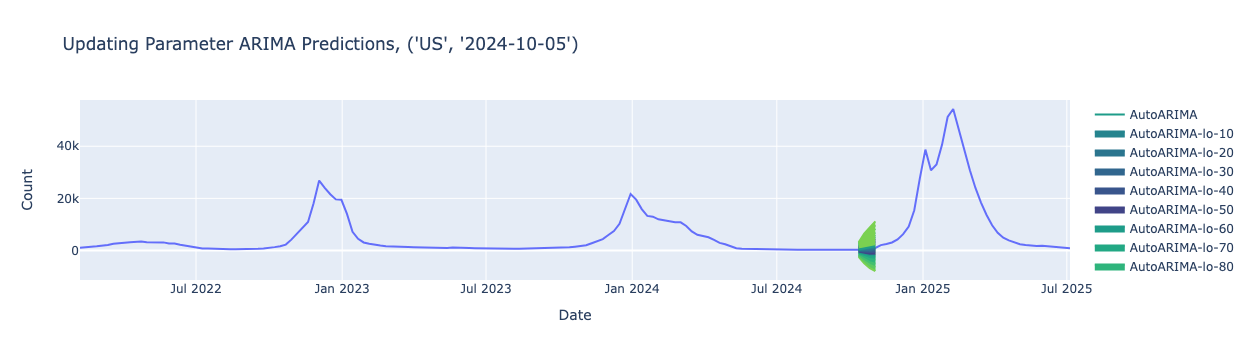

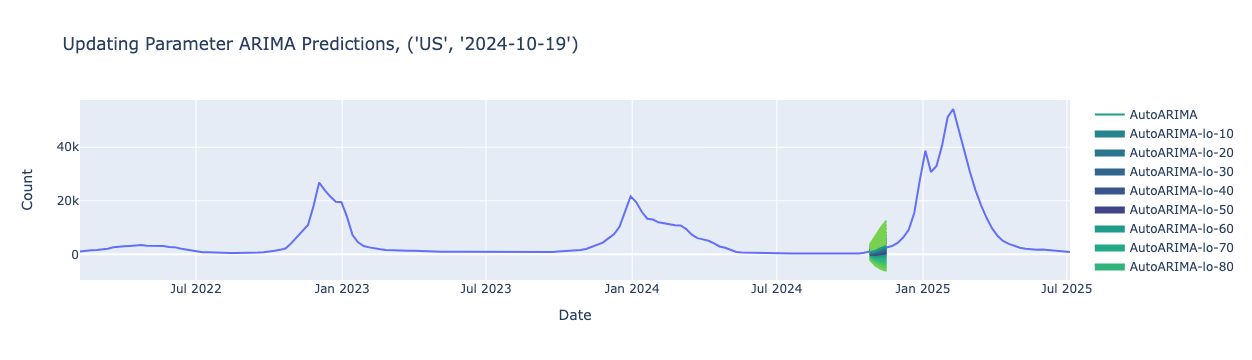

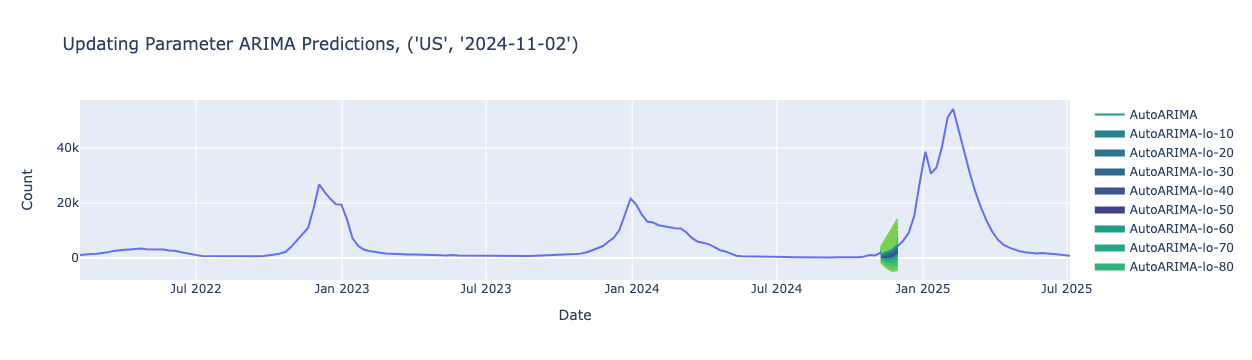

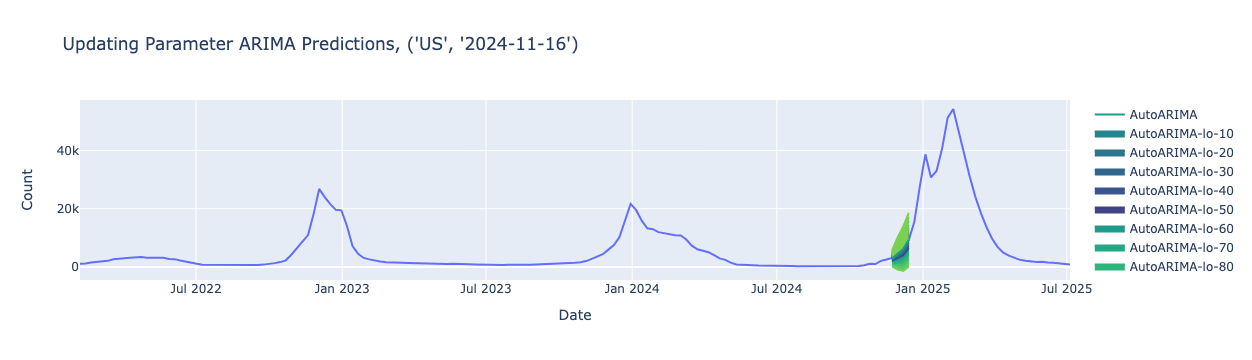

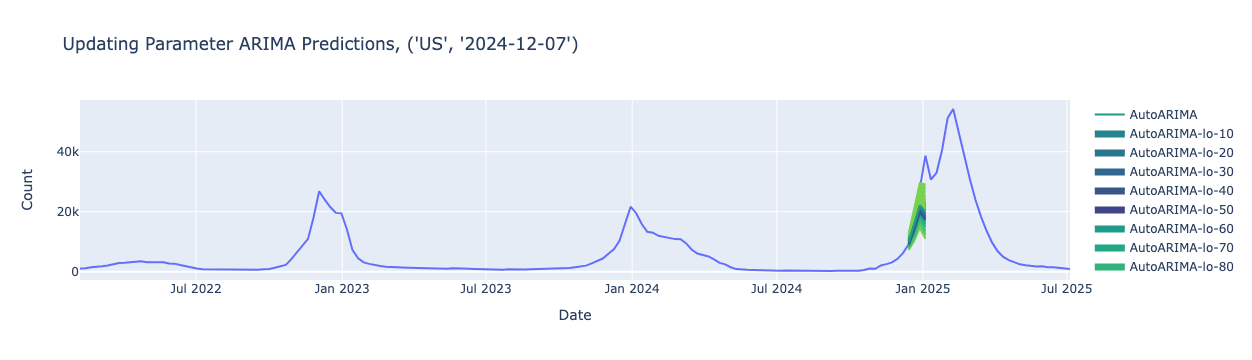

In [16]:
UAProcessor.create_graph("US")

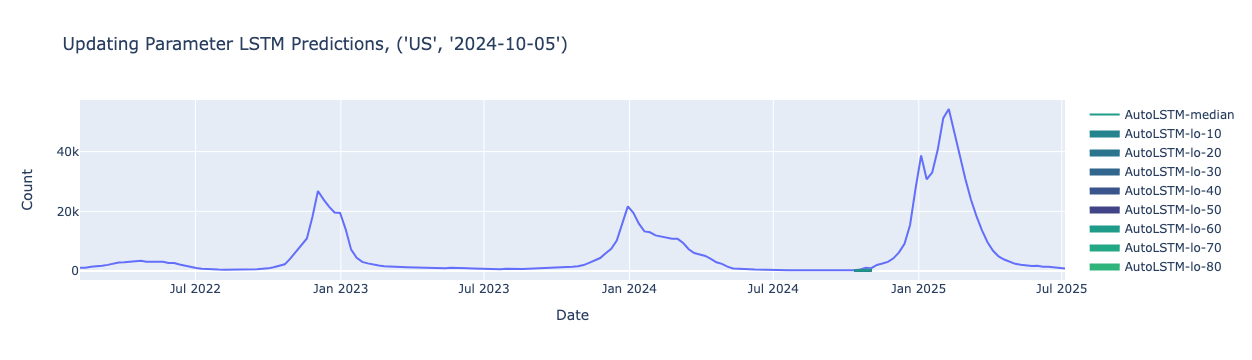

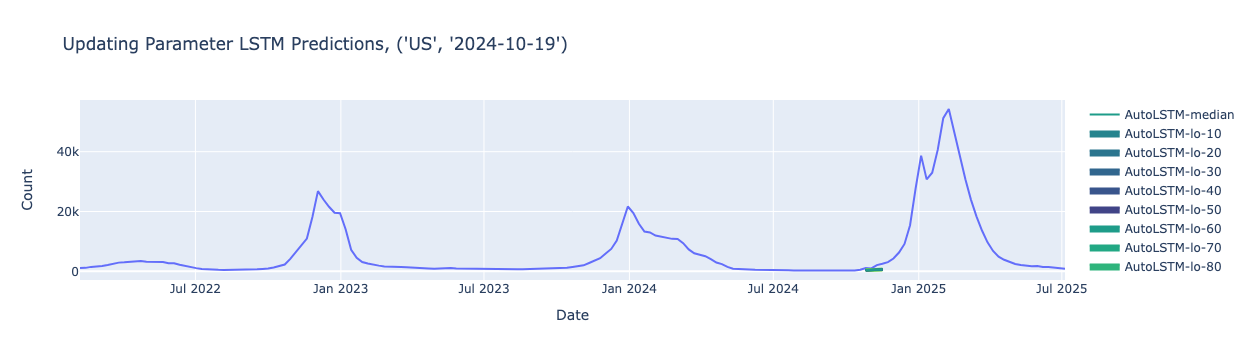

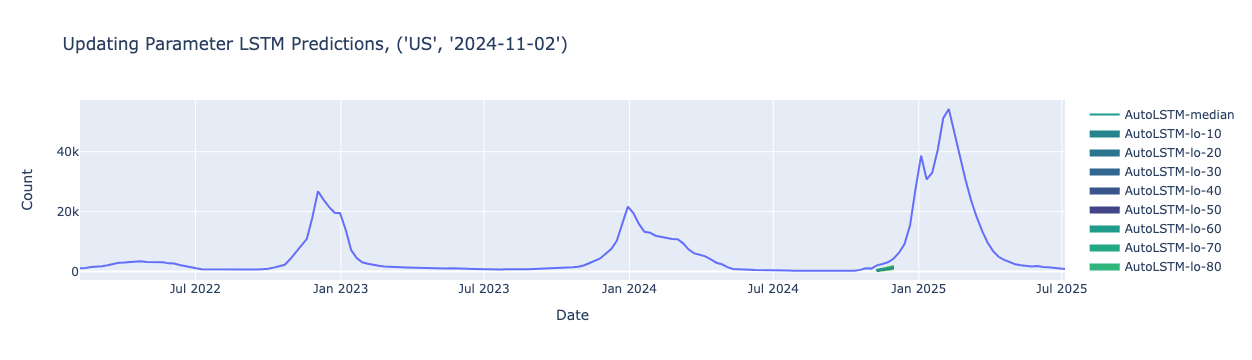

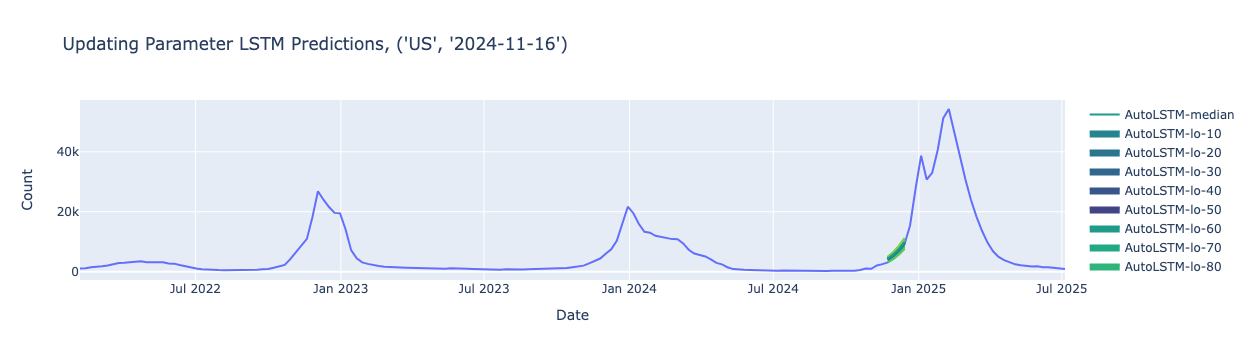

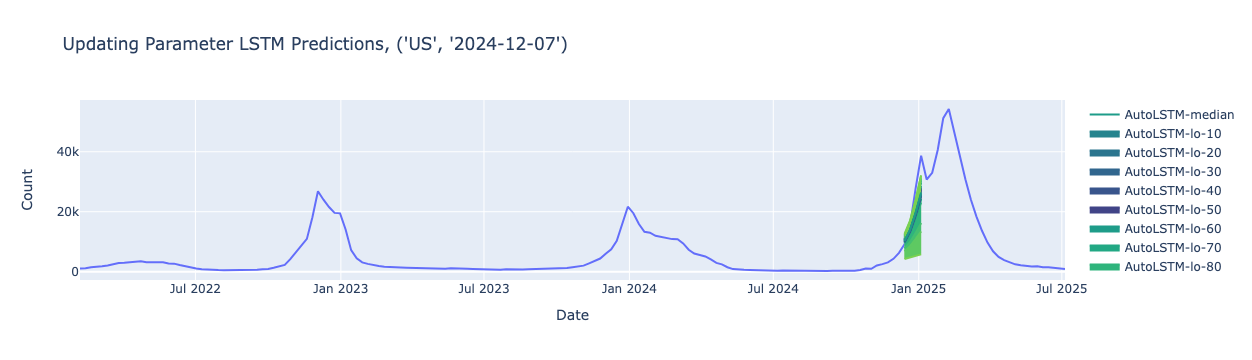

In [17]:
ULSTMProcessor.create_graph("US")

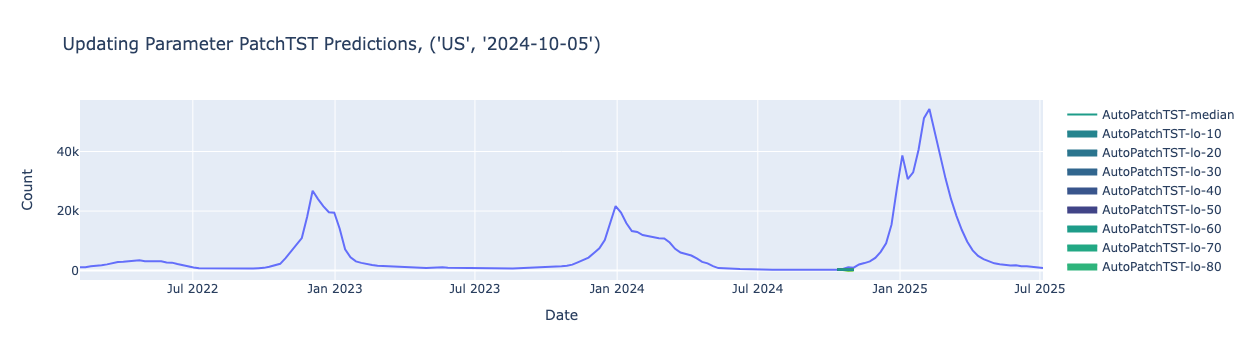

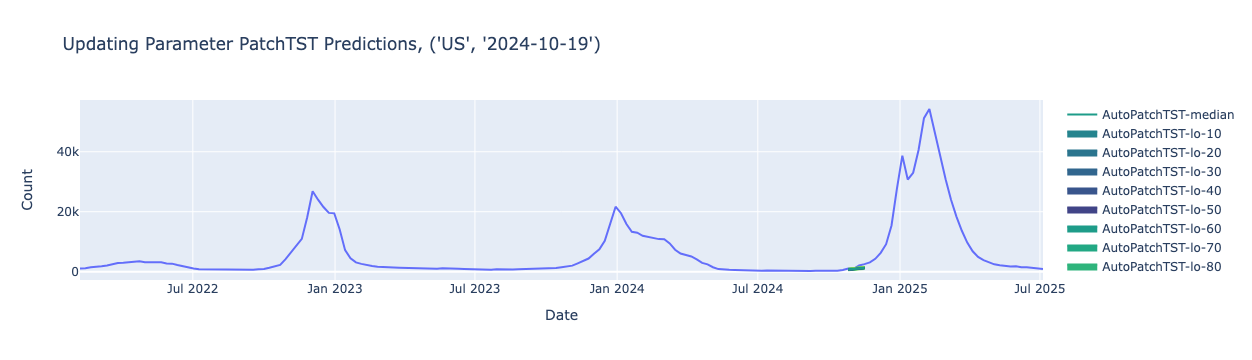

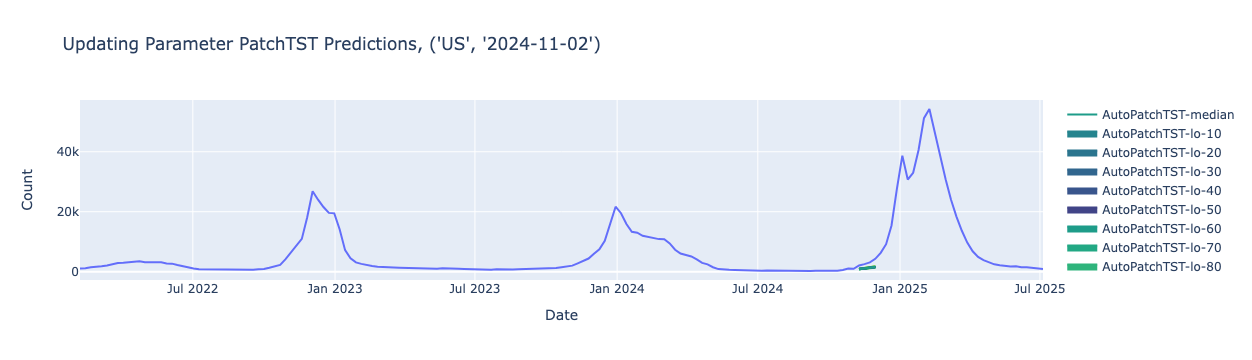

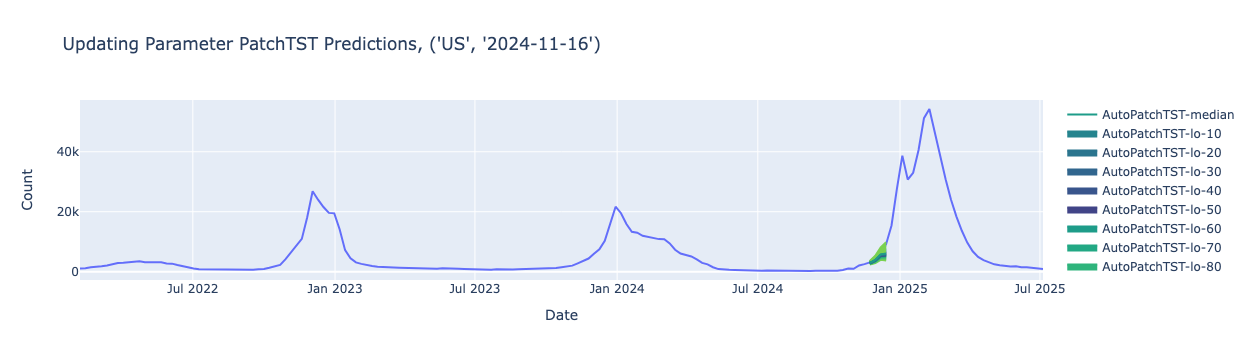

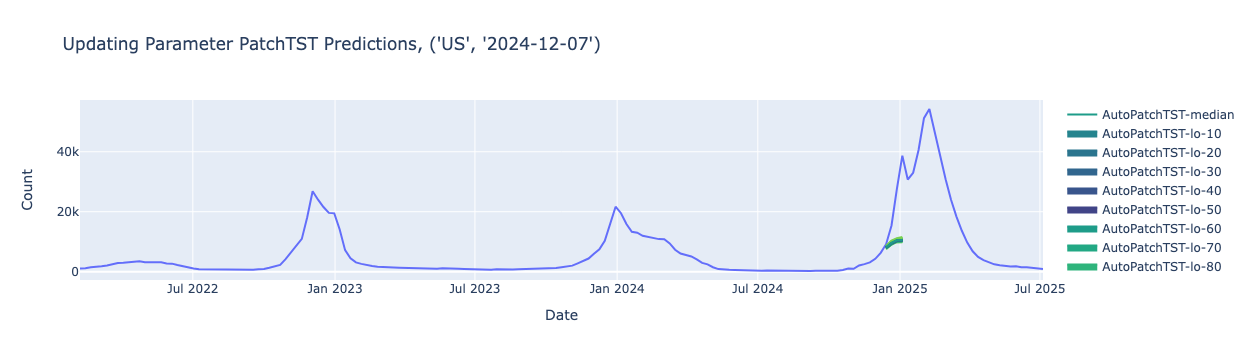

In [18]:
UTSTProcessor.create_graph("US")

In [19]:
UAProcessor.metrics_df

Reference Date unique_id          MAE           MSE      MAPE      NMSE
0     2024-10-05        US   256.514762  1.343962e+05  0.362767  1.325777
1     2024-10-19        US   378.780495  1.713714e+05  0.253049  0.397746
2     2024-11-02        US   502.380191  3.123110e+05  0.191569  0.459094
3     2024-11-16        US   194.865359  4.934328e+04  0.042741  0.009316
4     2024-12-07        US  6321.622785  9.498641e+07  0.196835  0.735587

In [20]:
ULSTMProcessor.metrics_df

Reference Date unique_id          MAE           MSE      MAPE      NMSE
0     2024-10-05        US   489.436050  3.212541e+05  0.608905  3.169072
1     2024-10-19        US  1158.486801  1.691091e+06  0.659349  3.924953
2     2024-11-02        US  2069.416260  4.430197e+06  0.710612  6.512350
3     2024-11-16        US  1138.986206  1.375700e+06  0.248714  0.259745
4     2024-12-07        US  5703.558838  5.452801e+07  0.204994  0.422272

In [21]:
UTSTProcessor.metrics_df

Reference Date unique_id           MAE           MSE      MAPE      NMSE
0     2024-10-05        US    411.601265  2.512900e+05  0.471422  2.478898
1     2024-10-19        US    668.149551  6.645070e+05  0.346271  1.542294
2     2024-11-02        US   1761.531586  3.430081e+06  0.583279  5.042189
3     2024-11-16        US   1050.491760  2.547825e+06  0.142963  0.481054
4     2024-12-07        US  13063.095215  2.809905e+08  0.460711  2.176027

In [22]:
UAProcessor.forecasts[-1]

unique_id         ds     AutoARIMA  AutoARIMA-lo-98  AutoARIMA-lo-95  \
0        US 2024-12-14   9958.918604      7248.948264      7675.750069   
1        US 2024-12-21  15702.599476     10274.510030     11129.397017   
2        US 2024-12-28  22126.107482     14647.148276     15825.033232   
3        US 2025-01-04  20024.919456     10951.948875     12380.879727   

   AutoARIMA-lo-90  AutoARIMA-lo-80  AutoARIMA-lo-70  AutoARIMA-lo-60  \
0      8042.823168      8466.034942      8751.573917      8978.511243   
1     11864.646987     12712.343115     13284.279668     13738.836710   
2     16838.079276     18006.056484     18794.085162     19420.385374   
3     13609.839092     15026.750531     15982.733953     16742.519271   

   AutoARIMA-lo-50  ...  AutoARIMA-hi-20  AutoARIMA-hi-30  AutoARIMA-hi-40  \
0      9173.203261  ...     10254.043483     10407.779691     10569.794497   
1     14128.806177  ...     16293.736662     16601.671356     16926.188140   
2     19957.695190  ...     22940.591279     23364.871504     23811.998954   
3     17394.347421  ...     21012.996450     21527.704699     22070.129666   

   AutoARIMA-hi-50  AutoARIMA-hi-60  AutoARIMA-hi-70  AutoARIMA-hi-80  \
0     10744.633947     10939.325965     11166.263291     11451.802265   
1     17276.392774     17666.362242     18120.919283     18692.855836   
2     24294.519774     24831.829590     25458.129802     26246.158480   
3     22655.491491     23307.319641     24067.104959     25023.088381   

   AutoARIMA-hi-90  AutoARIMA-hi-95  AutoARIMA-hi-98  
0     11875.014039     12242.087138     12668.888944  
1     19540.551964     20275.801935     21130.688921  
2     27414.135688     28427.181732     29605.066688  
3     26439.999820     27668.959185     29097.890037  

[4 rows x 25 columns]

In [25]:
#Plotting for UAProcessor
arima_df = UAProcessor.forecasts[-1][["ds", "unique_id", "AutoARIMA"]]
arima_df

ds unique_id     AutoARIMA
0 2024-12-14        US   9958.918604
1 2024-12-21        US  15702.599476
2 2024-12-28        US  22126.107482
3 2025-01-04        US  20024.919456

In [54]:
slice_real_df = updated_df.iloc[-50:].copy()

In [56]:
7.6*96

729.5999999999999

In [57]:
4.1*96

393.59999999999997

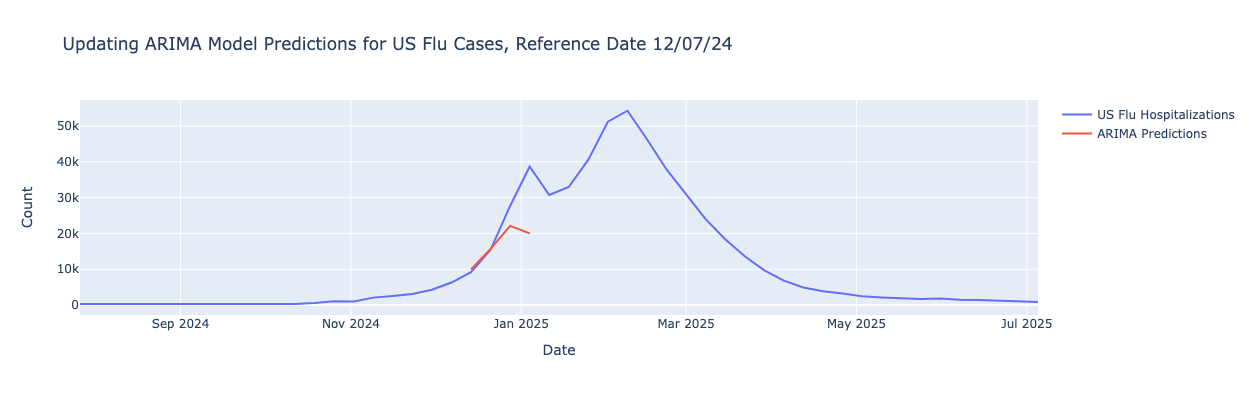

In [71]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=slice_real_df["ds"], y = slice_real_df["y"], name="US Flu Hospitalizations", mode="lines"))
fig.add_trace(go.Scatter(x = arima_df["ds"], y = arima_df["AutoARIMA"], name = "ARIMA Predictions", mode = "lines"))
fig.update_layout(title = "Updating ARIMA Model Predictions for US Flu Cases, Reference Date 12/07/24", xaxis_title = "Date", yaxis_title = "Count", hovermode = "x",
                 width = 730, height = 395)

fig.show()
fig.write_image(
    "ARIMA.png",
    width=730,
    height=395,
    scale=1
)

In [38]:
#Plotting for ULSTM Processor
LSTM_df = ULSTMProcessor.forecasts[-1][["ds", "unique_id", "AutoLSTM-median"]]

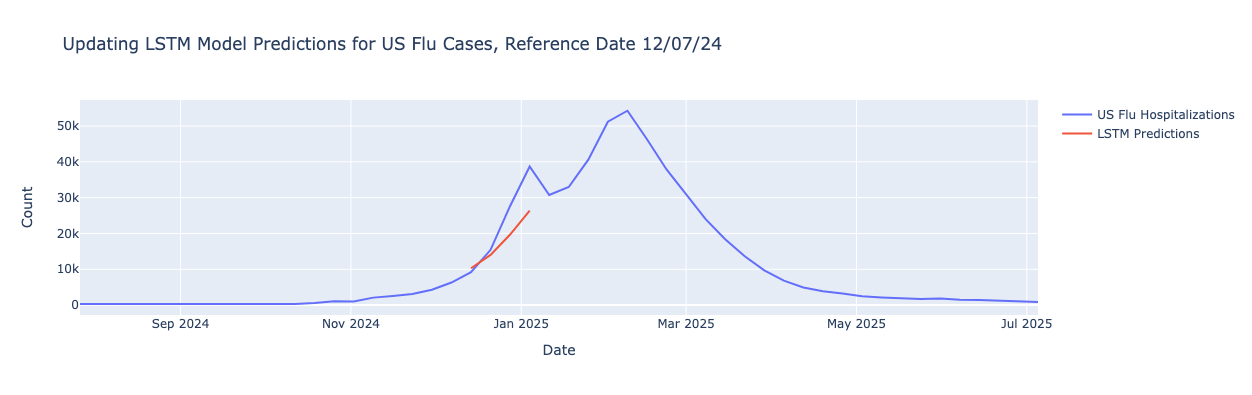

In [70]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=slice_real_df["ds"], y = slice_real_df["y"], name="US Flu Hospitalizations", mode="lines"))
fig.add_trace(go.Scatter(x = LSTM_df["ds"], y = LSTM_df["AutoLSTM-median"], name = "LSTM Predictions", mode = "lines"))
fig.update_layout(title = "Updating LSTM Model Predictions for US Flu Cases, Reference Date 12/07/24", xaxis_title = "Date", yaxis_title = "Count", hovermode = "x",
                 width = 730, height = 395)
fig.show()
fig.write_image(
    "LSTM.png",
    width=730,
    height=395,
    scale=1
)

In [44]:
#Plotting for PatchTST Processor
TST_df = UTSTProcessor.forecasts[-1][["ds", "unique_id", "AutoPatchTST-median"]]

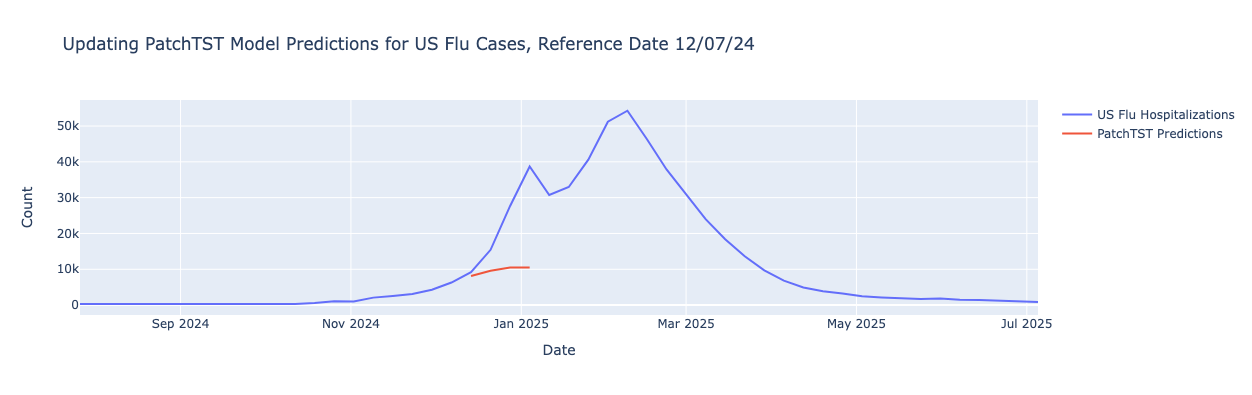

In [72]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=slice_real_df["ds"], y = slice_real_df["y"], name="US Flu Hospitalizations", mode="lines"))
fig.add_trace(go.Scatter(x = TST_df["ds"], y = TST_df["AutoPatchTST-median"], name = "PatchTST Predictions", mode = "lines"))
fig.update_layout(title = "Updating PatchTST Model Predictions for US Flu Cases, Reference Date 12/07/24", xaxis_title = "Date", yaxis_title = "Count", hovermode = "x",
                 width = 730, height = 395)
fig.show()
fig.write_image(
    "PatchTST.png",
    width=730,
    height=395,
    scale=1
)